In [1]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from imp import reload

from pgtools import toolbox, myplots
import pygbrowse
import empdist
from empdist import EmpiricalDistribution
from peas import scoring, arrayfuncs

In [2]:
seaborn.set_style('darkgrid')

In [3]:
reload(empdist)
reload(arrayfuncs)
reload(scoring)

<module 'peas.scoring' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/scoring.py'>

In [5]:
n=1000000
data_distro = scipy.stats.gumbel_r
test_data = data_distro().rvs(n)

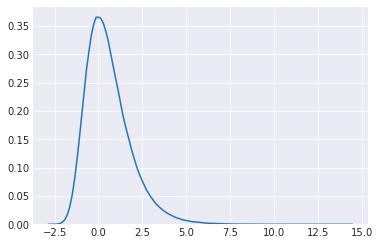

In [6]:
seaborn.kdeplot(test_data)

In [36]:
def heatmap_centered_cmap(data, heatmap_kwargs={}):
    extent = numpy.max(numpy.abs(data))
    seaborn.heatmap(data, vmin=-extent, vmax=extent, cmap='RdBu_r', **heatmap_kwargs)

14.25251987782497


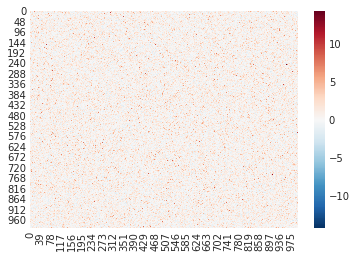

In [39]:
test_matrix = test_data.reshape(1000,1000)
heatmap_centered_cmap(test_matrix)

## Mean

11.409063895324099


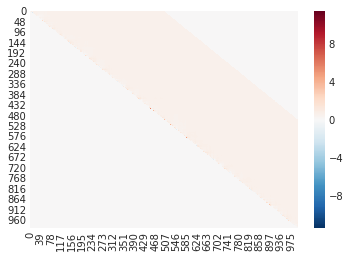

In [37]:
ground_truth_means = scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)
heatmap_centered_cmap(ground_truth_means)

In [149]:
import peas.scoring
reload(peas.scoring)
from peas.scoring import *

In [134]:
x = test_matrix.copy()
numpy.random.shuffle(x)

<module 'peas.scoring' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/scoring.py'>

In [136]:
for k in range(0,500):
    print(k, numpy.sum(numpy.less(numpy.abs(numpy.diag(test_matrix, k)), 1e-5)))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 1
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 1
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 1
168 0
169 1
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


In [146]:
%%time
ground_truth_shuffled_means = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                      num_shuffles=10,
                                                                      min_region_size=2,
                                                                      max_region_size=500,
                                                                      start_diagonal=1,
                                                                      matrix_score_func=scoring.compute_mean_table_2d,
                                                                      random_seed=1,
                                                                     )

2018-Aug-25 17:51:18			Setting random seed to 1
2018-Aug-25 17:51:18				permutation 1 of 10
CPU times: user 909 ms, sys: 13 ms, total: 922 ms
Wall time: 919 ms


In [147]:
%%time
reload(scoring)
ground_truth_shuffled_means = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                      num_shuffles=1000,
                                                                      min_region_size=2,
                                                                      max_region_size=500,
                                                                      start_diagonal=1,
                                                                      matrix_score_func=scoring.compute_mean_table_2d,
                                                                      random_seed=1,
                                                                     )

2018-Aug-25 17:51:27			Setting random seed to 1
2018-Aug-25 17:51:27				permutation 1 of 1000
2018-Aug-25 17:51:28				permutation 13 of 1000
2018-Aug-25 17:51:29				permutation 25 of 1000
2018-Aug-25 17:51:30				permutation 37 of 1000
2018-Aug-25 17:51:31				permutation 50 of 1000
2018-Aug-25 17:51:32				permutation 63 of 1000
2018-Aug-25 17:51:34				permutation 76 of 1000
2018-Aug-25 17:51:35				permutation 89 of 1000
2018-Aug-25 17:51:36				permutation 102 of 1000
2018-Aug-25 17:51:37				permutation 115 of 1000
2018-Aug-25 17:51:38				permutation 127 of 1000
2018-Aug-25 17:51:39				permutation 140 of 1000
2018-Aug-25 17:51:40				permutation 153 of 1000
2018-Aug-25 17:51:41				permutation 166 of 1000
2018-Aug-25 17:51:42				permutation 179 of 1000
2018-Aug-25 17:51:43				permutation 192 of 1000
2018-Aug-25 17:51:44				permutation 204 of 1000
2018-Aug-25 17:51:45				permutation 217 of 1000
2018-Aug-25 17:51:46				permutation 230 of 1000
2018-Aug-25 17:51:47				permutation 243 of 1000
2

In [152]:
def zero_count(arr):
    return numpy.sum(numpy.less(numpy.abs(arr), 1e-8))

In [153]:
for region_size, data in sorted(ground_truth_shuffled_means.items()):
    print(region_size, zero_count(data))

2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 0
18

In [154]:
%%time
ground_truth_shuffled_means = {sample_size:numpy.sort(ground_truth_shuffled_means[sample_size]) for sample_size in ground_truth_shuffled_means}

CPU times: user 5min 51s, sys: 23 s, total: 6min 14s
Wall time: 13.4 s


In [155]:
for region_size, data in sorted(ground_truth_shuffled_means.items()):
    print(region_size, zero_count(data))

2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 0
18

In [156]:
import peas
reload(peas)
reload(peas.distributions)
reload(peas.helper_funcs)

<module 'peas.fitapproxdistros.helper_funcs' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/fitapproxdistros/helper_funcs.py'>

In [157]:
distribution_class

NameError: name 'distribution_class' is not defined

In [158]:
%%time
distro_class = peas.distributions.PiecewiseApproxLinear
distro_pw_linear_params = peas.helper_funcs.fit_distros(ground_truth_shuffled_means,
                                               distribution_class=distro_class, 
                                                           filter_window_size=None)
predicted_mean_distros_pw_linear = {size:distro_class(*params) for size, params in distro_pw_linear_params.items()}

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [82]:
param_df = pandas.DataFrame(distro_pw_linear_params, index=['inflection_point', 'slope']).T
param_df.index.name = 'sample_size'

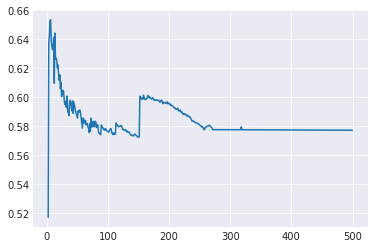

In [83]:
plt.plot(param_df['inflection_point'])

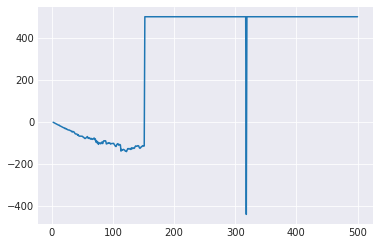

In [84]:
plt.plot(param_df['slope'])

## Try fitting directly

In [124]:
DEFAULT_SUPPORT_QUANTILE = 0.8
class PiecewiseApproxLinearDirect:
    """
    Stub class for an empirical distribution with methods to:
        1. Fit a piecewise linear function to the log-survival function of a data sample
        2. Compute the value of the log-survival function for given x.
    """

    def __init__(self, inflection_point, slope):
        self.inflection_point = inflection_point
        self.slope = slope

    @staticmethod
    def _piecewise_logsf(x, inflection_point, slope):
        """
        A piecewise linear function that = 0 for all x < :param:`inflection_point`
            and rises linearly with slope :param:`slope` for all points > :param:`inflection_point`
        """
        return numpy.piecewise(x, [x < inflection_point], [lambda x: 0, lambda x: slope * (x - inflection_point)])

    @classmethod
    def fit(cls, data, is_sorted=False, support_quantile=DEFAULT_SUPPORT_QUANTILE):
        inflection_point = data.mean()
        # print('min: {} max: {} midpoint: {} extent: {} support: {}'.format(data_min, data_max, midpoint, extent, support))
        min_val, max_val = data.min(), data.max()
        
        endpoint = (max_val - min_val) * support_quantile + min_val
        print(min_val, max_val, endpoint)

        fit_xs = [inflection_point, endpoint]
        fit_ys = [0, numpy.log(compute_empirical_pvalue(data, values=endpoint, tail='right', is_sorted=is_sorted))]
                
        slope = (fit_ys[1] - fit_ys[0]) / (fit_xs[1] - fit_xs[0])
        print(fit_xs, fit_ys, slope)
        
        return inflection_point, slope
    

    def logsf(self, x):
        return self._piecewise_logsf(x, self.inflection_point, self.slope)


In [115]:
reload(empdist.empirical_pval )

from empdist.empirical_pval import compute_empirical_pvalue

(array([  1000.,      0.,      0.,      0.,      0.,      0.,      0.,
          1127., 664222., 234651.]),
 array([0.        , 0.06553265, 0.1310653 , 0.19659794, 0.26213059,
        0.32766324, 0.39319589, 0.45872854, 0.52426119, 0.58979383,
        0.65532648]),
 <a list of 10 Patch objects>)

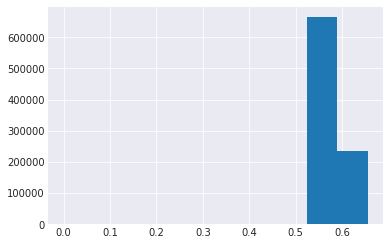

In [129]:
plt.hist(this_data)


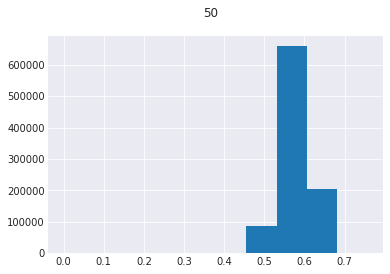

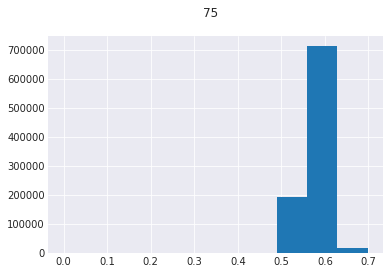

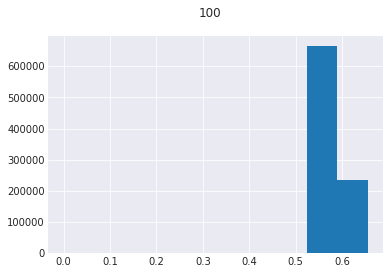

In [128]:
for size in [50,75, 100]:

    this_data = ground_truth_shuffled_means[size]
    plt.hist(this_data)
    plt.suptitle(size)
    plt.show()

0.0 0.7582012313231137 0.606560985058491
[0.5777681497171705, 0.606560985058491] [0, -1.5349540161510469] -53.310276600242986


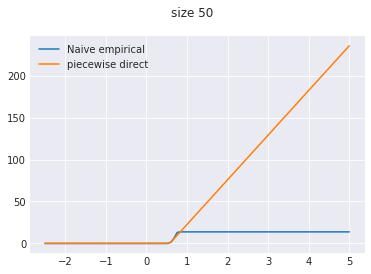

0.0 0.6986754501197124 0.55894036009577
[0.5776512658969858, 0.55894036009577] [0, -0.23765134446156586] 12.701220720491442


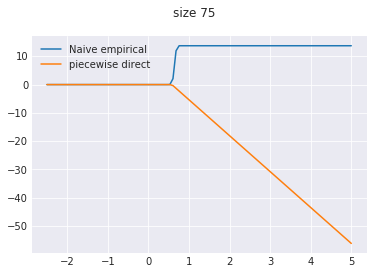

0.0 0.6553264819758091 0.5242611855806473
[0.577599759909018, 0.5242611855806473] [0, -0.0023634985653343834] 0.04431124369361407


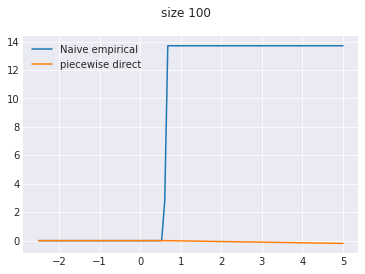

In [125]:
xs = numpy.linspace(-2.5, 5, num=100)

# for size in [2,3,4,100,200,400]:
for size in [50,75, 100]:

    this_data = ground_truth_shuffled_means[size]
    empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                values=xs, tail='right', is_sorted=True)
    empirical_pscores = -1 * numpy.log(empirical_pvals)
    
    plt.plot(xs, empirical_pscores, label='Naive empirical')
    this_distro = PiecewiseApproxLinearDirect(*PiecewiseApproxLinearDirect.fit(this_data))
#     plt.plot(xs, -1 * predicted_mean_distros_pw_linear[size].logsf(xs), label='piecewise linear unsmoothed')
    plt.plot(xs, -1 * this_distro.logsf(xs), label='piecewise direct')

    plt.suptitle('size {}'.format(size))
    plt.legend()
    plt.show()

In [ ]:
sizes = numpy.sort(distro_pw_linear_params.keys())
plt.plot()

In [ ]:
%%time
distro_class = scipy.stats.norm
distro_params = peas.helper_funcs.fit_distros(ground_truth_shuffled_means,
                                               distribution_class=distro_class, 
                                                           filter_window_size=5)
predicted_mean_distros_norm = {size:distro_class(*params) for size, params in distro_params.items()}

In [22]:
predicted_mean_distros_norm = peas.helper_funcs.fit_distros(ground_truth_shuffled_means,
                                                       scipy.stats.norm, 
                                                       filter_window_size=5)

2018-Aug-25 15:07:17			size: 2 fit parameters: (0.5788474505067827, 1.2851915357580999)
2018-Aug-25 15:07:17			size: 3 fit parameters: (0.5786850871043521, 0.7416064561401845)
2018-Aug-25 15:07:17			size: 4 fit parameters: (0.5783818736384551, 0.52402956996005)
2018-Aug-25 15:07:17			size: 5 fit parameters: (0.5783506150690113, 0.4054470094018255)
2018-Aug-25 15:07:17			size: 6 fit parameters: (0.5784939849010283, 0.3310909404886112)
2018-Aug-25 15:07:17			size: 7 fit parameters: (0.5786139853678647, 0.27981850146358794)
2018-Aug-25 15:07:17			size: 8 fit parameters: (0.5786717899516061, 0.2422944725879773)
2018-Aug-25 15:07:17			size: 9 fit parameters: (0.5787032721750642, 0.21370774985881458)
2018-Aug-25 15:07:17			size: 10 fit parameters: (0.5787336349806593, 0.19120412378227666)
2018-Aug-25 15:07:17			size: 11 fit parameters: (0.5787525292154785, 0.17300689085866672)
2018-Aug-25 15:07:17			size: 12 fit parameters: (0.5787488646036565, 0.15798992202619505)
2018-Aug-25 15:07:17			siz

2018-Aug-25 15:07:18			size: 114 fit parameters: (0.5782451035823861, 0.01602835202071621)
2018-Aug-25 15:07:18			size: 115 fit parameters: (0.5782461016780076, 0.015888626556022495)
2018-Aug-25 15:07:18			size: 116 fit parameters: (0.5782477498955624, 0.015750513701940666)
2018-Aug-25 15:07:18			size: 117 fit parameters: (0.5782491487995768, 0.015614937530389096)
2018-Aug-25 15:07:18			size: 118 fit parameters: (0.578250517990473, 0.015481090313350286)
2018-Aug-25 15:07:18			size: 119 fit parameters: (0.578251629026247, 0.015350323249959634)
2018-Aug-25 15:07:18			size: 120 fit parameters: (0.5782524641966684, 0.015221713236137647)
2018-Aug-25 15:07:18			size: 121 fit parameters: (0.5782529451012692, 0.015095369092085439)
2018-Aug-25 15:07:18			size: 122 fit parameters: (0.5782533374517133, 0.014971380815635406)
2018-Aug-25 15:07:18			size: 123 fit parameters: (0.5782537124107916, 0.014849039996654175)
2018-Aug-25 15:07:18			size: 124 fit parameters: (0.5782543376144406, 0.01472892818

2018-Aug-25 15:07:18			size: 246 fit parameters: (0.5782590523355124, 0.007301990296275328)
2018-Aug-25 15:07:18			size: 247 fit parameters: (0.5782589639515641, 0.007271317799235737)
2018-Aug-25 15:07:18			size: 248 fit parameters: (0.5782589067264043, 0.007240910717248892)
2018-Aug-25 15:07:18			size: 249 fit parameters: (0.578258908385457, 0.0072107100443952726)
2018-Aug-25 15:07:18			size: 250 fit parameters: (0.5782589185470134, 0.007180953952243777)
2018-Aug-25 15:07:18			size: 251 fit parameters: (0.578258897488029, 0.007151296497588468)
2018-Aug-25 15:07:18			size: 252 fit parameters: (0.5782587670687103, 0.0071218000007031695)
2018-Aug-25 15:07:18			size: 253 fit parameters: (0.5782585622126002, 0.007092625647284182)
2018-Aug-25 15:07:18			size: 254 fit parameters: (0.5782583832491239, 0.00706362361868819)
2018-Aug-25 15:07:18			size: 255 fit parameters: (0.5782582132301816, 0.007034840956651571)
2018-Aug-25 15:07:18			size: 256 fit parameters: (0.5782579556177301, 0.007006307

2018-Aug-25 15:07:19			size: 404 fit parameters: (0.5782333813492643, 0.004285998678138415)
2018-Aug-25 15:07:19			size: 405 fit parameters: (0.5782331380243346, 0.004274567612606676)
2018-Aug-25 15:07:19			size: 406 fit parameters: (0.5782328905987487, 0.00426313639846056)
2018-Aug-25 15:07:19			size: 407 fit parameters: (0.5782326350951483, 0.004251763084306876)
2018-Aug-25 15:07:19			size: 408 fit parameters: (0.5782323827217962, 0.004240422160591269)
2018-Aug-25 15:07:19			size: 409 fit parameters: (0.5782321228545719, 0.004229092740743781)
2018-Aug-25 15:07:19			size: 410 fit parameters: (0.5782319039906317, 0.004217787837494451)
2018-Aug-25 15:07:19			size: 411 fit parameters: (0.578231682731948, 0.004206572792642279)
2018-Aug-25 15:07:19			size: 412 fit parameters: (0.5782314475477938, 0.004195430572362454)
2018-Aug-25 15:07:19			size: 413 fit parameters: (0.5782312041392903, 0.004184304966488309)
2018-Aug-25 15:07:19			size: 414 fit parameters: (0.578230965131275, 0.00417323080

size: 2, mean 0.5788474505067827
size: 3, mean 0.5786850871043521
size: 4, mean 0.5783818736384551
size: 5, mean 0.5783506150690113
size: 10, mean 0.5787336349806593


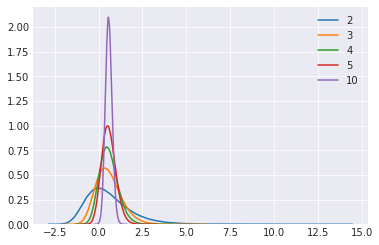

In [27]:
SIZES = [2, 3, 4, 5, 10]
for size in SIZES:
    seaborn.kdeplot(ground_truth_shuffled_means[size], label=size)
    print('size: {}, mean {}'.format(size, ground_truth_shuffled_means[size].mean()))
plt.legend()

### Compute p-score from:
    1. Empirical
    2. Normal approximation
    3. Linear approximation
    4. Power approximation
    

In [51]:
xs = numpy.linspace(test_matrix.min(), test_matrix.max(), num=100)

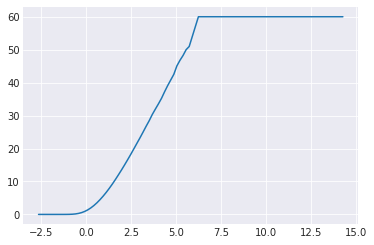

In [58]:
pvals = empdist.empirical_pval.compute_empirical_pvalue(data=ground_truth_shuffled_means[2],
                                                values=xs, tail='right', is_sorted=True)
pscores = -10 * numpy.log10(pvals)
plt.plot(xs, pscores)

In [59]:
mean_pscores = {}



for size in SIZES:
    this_size_results = {}
    # empirical
    pvals = empdist.empirical_pval.compute_empirical_pvalue(data=ground_truth_shuffled_means[2],
                                                values=xs, tail='right', is_sorted=True)
    pscores = -10 * numpy.log10(pvals)
    this_size_results['empirical'] = pscores
    
    # normal
    pscores = 10 * predicted_mean_distros_norm[size].logsf(xs)


AttributeError: 'list' object has no attribute 'logsf'

In [60]:
predicted_mean_distros_norm[size]

[0.5787600828932954, 1.1063452298052208]